In [ ]:
import nbformat
import os
import shutil

def repair_widgets_metadata(notebook_path):
    try:
        # Load notebook safely
        nb = nbformat.read(notebook_path, as_version=4)
        md = nb.metadata

        # Create backup
        backup_path = notebook_path + ".bak"
        if not os.path.exists(backup_path):
            shutil.copy2(notebook_path, backup_path)
            print(f"🧾 Backup created: {backup_path}")

        if "widgets" in md:
            widgets = md["widgets"]

            # The canonical structure we want
            expected = {
                "application/vnd.jupyter.widget-state+json": {
                    "state": {},
                    "version_major": 2,
                    "version_minor": 0
                }
            }

            # Fix cases
            if not isinstance(widgets, dict) or "application/vnd.jupyter.widget-state+json" not in widgets:
                print(f"🧹 Removing invalid widget metadata from: {notebook_path}")
                md.pop("widgets", None)
            else:
                widget_json = widgets["application/vnd.jupyter.widget-state+json"]
                # Ensure required fields
                if "state" not in widget_json:
                    print(f"🔧 Adding missing 'state' key to: {notebook_path}")
                    widget_json["state"] = {}
                if "version_major" not in widget_json:
                    widget_json["version_major"] = 2
                if "version_minor" not in widget_json:
                    widget_json["version_minor"] = 0

        # Save fixed notebook
        nbformat.write(nb, notebook_path)
    except Exception as e:
        print(f"⚠️ Error processing {notebook_path}: {e}")

def repair_all_notebooks(folder):
    for root, _, files in os.walk(folder):
        for f in files:
            if f.endswith(".ipynb"):
                repair_widgets_metadata(os.path.join(root, f))

if __name__ == "__main__":
    folder = input("Enter folder containing notebooks: ").strip()
    if not os.path.isdir(folder):
        print("❌ Invalid folder path.")
    else:
        repair_all_notebooks(folder)
        print("\n✅ Done! All notebooks repaired successfully.")


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/videos_labels.csv'

In [ ]:
df = pd.read_csv(dataset_path)

In [ ]:
df.head(10)

,video_id,label
0,id2_id1_0008,0
1,id3_id17_0007,0
2,00144,1
3,id0_id17_0002,0
4,id3_id4_0004,0
5,id9_id6_0001,0
6,id9_id3_0006,0
7,id3_id16_0003,0
8,id8_0005,1
9,id11_0001,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  1203 non-null   object
 1   label     1203 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.9+ KB


In [ ]:
df.nunique()

,0
video_id,1203
label,2


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['video_id'], dtype='object')

Numerical type columns:
Index(['label'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: ['video_id']
Discrete Features: ['label']
Continuous Features: []


**Missing values**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
real_df = df[df["label"] == 1]
fake_df = df[df["label"] == 0]
sample_size = 1000

# real_df = real_df.sample(sample_size, random_state=42)
# fake_df = fake_df.sample(sample_size, random_state=42)

# sample_meta = pd.concat([real_df, fake_df])


# Check if the sample size is greater than the length of the DataFrame
if sample_size >= len(df):
    raise ValueError(f"Sample size {sample_size} is greater than the available number of rows in the fake_df ({len(df)}).")

# Sampling the df
sample_meta = df.sample(sample_size, random_state=42)

# Display the sampled DataFrame
print(sample_meta)


            video_id  label
1133           00195      1
425    id16_id6_0007      0
78    id10_id11_0004      0
803     id9_id2_0000      0
590            00063      1
...              ...    ...
880            00139      1
571     id9_id3_0005      0
623        id12_0000      1
345            00074      1
1032   id16_id1_0002      0

[1000 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


Training set size: 721
Validation set size: 241
Test set size: 241


In [ ]:
print(train_df)

           video_id  label
1197       id8_0007      1
722    id9_id0_0009      0
707   id17_id1_0002      0
689    id1_id0_0005      0
212   id1_id17_0001      0
...             ...    ...
352           00200      1
82    id3_id16_0001      0
502           00110      1
368           00222      1
2             00144      1

[721 rows x 2 columns]


In [ ]:
video_dict = dict(zip(train_df['video_id'], train_df['label']))
print(video_dict)
print(len(video_dict))

{'id8_0007': 1, 'id9_id0_0009': 0, 'id17_id1_0002': 0, 'id1_id0_0005': 0, 'id1_id17_0001': 0, 'id16_id17_0009': 0, 'id16_0007': 1, 'id9_id2_0007': 0, 'id4_id6_0004': 0, 'id3_id2_0006': 0, '00094': 1, 'id9_id1_0001': 0, 'id10_id13_0002': 0, 'id3_id16_0003': 0, '00024': 1, '00166': 1, 'id6_id4_0004': 0, 'id11_id7_0000': 0, 'id2_id9_0007': 0, 'id7_id13_0004': 0, 'id3_id16_0000': 0, 'id4_id1_0000': 0, '00213': 1, '00174': 1, '00051': 1, 'id1_id4_0000': 0, 'id3_0005': 1, 'id3_id17_0000': 0, 'id2_id3_0009': 0, 'id16_id0_0012': 0, 'id4_0004': 1, '00238': 1, '00214': 1, 'id2_id0_0006': 0, 'id8_0004': 1, 'id13_id10_0008': 0, 'id1_id6_0007': 0, '00197': 1, 'id2_id16_0001': 0, 'id0_id2_0009': 0, '00185': 1, 'id1_0000': 1, '00162': 1, 'id9_id1_0004': 0, '00026': 1, 'id2_id6_0003': 0, 'id6_id9_0007': 0, 'id1_id4_0004': 0, 'id4_id0_0004': 0, 'id6_id0_0006': 0, 'id9_0006': 1, 'id4_id2_0007': 0, '00004': 1, 'id17_0009': 1, 'id1_id4_0003': 0, '00122': 1, 'id10_0003': 1, 'id0_id4_0002': 0, 'id4_id0_0000

In [ ]:
for video_id, label in video_dict.items():
    # Construct the full file path
    if label == 0:
      print(f"{video_id}, {label}")
    else:
      print(f"{video_id}, {label}")

id8_0007, 1
id9_id0_0009, 0
id17_id1_0002, 0
id1_id0_0005, 0
id1_id17_0001, 0
id16_id17_0009, 0
id16_0007, 1
id9_id2_0007, 0
id4_id6_0004, 0
id3_id2_0006, 0
00094, 1
id9_id1_0001, 0
id10_id13_0002, 0
id3_id16_0003, 0
00024, 1
00166, 1
id6_id4_0004, 0
id11_id7_0000, 0
id2_id9_0007, 0
id7_id13_0004, 0
id3_id16_0000, 0
id4_id1_0000, 0
00213, 1
00174, 1
00051, 1
id1_id4_0000, 0
id3_0005, 1
id3_id17_0000, 0
id2_id3_0009, 0
id16_id0_0012, 0
id4_0004, 1
00238, 1
00214, 1
id2_id0_0006, 0
id8_0004, 1
id13_id10_0008, 0
id1_id6_0007, 0
00197, 1
id2_id16_0001, 0
id0_id2_0009, 0
00185, 1
id1_0000, 1
00162, 1
id9_id1_0004, 0
00026, 1
id2_id6_0003, 0
id6_id9_0007, 0
id1_id4_0004, 0
id4_id0_0004, 0
id6_id0_0006, 0
id9_0006, 1
id4_id2_0007, 0
00004, 1
id17_0009, 1
id1_id4_0003, 0
00122, 1
id10_0003, 1
id0_id4_0002, 0
id4_id0_0000, 0
00148, 1
id7_0004, 1
id0_id9_0003, 0
id1_id3_0006, 0
id4_id1_0002, 0
00006, 1
id17_id6_0003, 0
id9_id1_0002, 0
00068, 1
id0_id2_0002, 0
id2_id3_0002, 0
id0_0008, 1
id3_id6_

# For Cropped Data (NO MORE RUN)

In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(train_df['video_id'], train_df['label']))

# Paths
fake_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/fake'
real_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/real'
destination_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/train_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def move_videos(video_dict, fake_folder, real_folder,  destination_folder):
    for video_id, label in video_dict.items():
        # Construct the full file path
        if label == 0:
          video_file = os.path.join(fake_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        else:
          video_file = os.path.join(real_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        if os.path.isfile(video_file):
            # Move the video
            shutil.copy(video_file, destination_folder)
            print(f"copied")
        else:
            print(f"Video {video_file} not found!")

# Move the videos
move_videos(video_dict, fake_folder, real_folder,  destination_folder)


copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied

# For Orignal Data ((NO MORE RUN)

In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(train_df['video_id'], train_df['label']))

# Paths
fake_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis'
real_folder1 = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-real'
real_folder2 = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/YouTube-real'
destination_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/train_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def move_videos(video_dict, fake_folder, real_folder1, real_folder2, destination_folder):
    for video_id, label in video_dict.items():
        # Construct the full file path
        if label == 0:
            video_file = os.path.join(fake_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        else:
            # Check both real folders for the video
            video_file1 = os.path.join(real_folder1, f"{video_id}.mp4")
            video_file2 = os.path.join(real_folder2, f"{video_id}.mp4")
            video_file = video_file1 if os.path.isfile(video_file1) else video_file2

        if os.path.isfile(video_file):
            # Move the video
            shutil.copy(video_file, destination_folder)
            print(f"Copied {video_file} to {destination_folder}")
        else:
            print(f"Video {video_id}.mp4 not found in either real folder!")

# Move the videos, passing both real folder paths separately
move_videos(video_dict, fake_folder, real_folder1, real_folder2, destination_folder)

Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-real/id8_0007.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/train_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id9_id0_0009.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/train_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id17_id1_0002.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/train_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id1_id0_0005.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/train_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id1_id17_0001.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/train_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id16_id17_0009.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/train_df_vide

# For Cropped Data (NO MORE RUN)

In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(val_df['video_id'], val_df['label']))

# Paths
fake_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/fake'
real_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/real'
destination_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/val_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def move_videos(video_dict, fake_folder, real_folder,  destination_folder):
    for video_id, label in video_dict.items():
        # Construct the full file path
        if label == 0:
          video_file = os.path.join(fake_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        else:
          video_file = os.path.join(real_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        if os.path.isfile(video_file):
            # Move the video
            shutil.copy(video_file, destination_folder)
            print(f"copied")
        else:
            print(f"Video {video_file} not found!")

# Move the videos
move_videos(video_dict, fake_folder, real_folder,  destination_folder)


copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied

# For Orignal Data (NO MORE RUN)

In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(val_df['video_id'], val_df['label']))

# Paths
fake_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis'
real_folder1 = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-real'
real_folder2 = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/YouTube-real'
destination_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/val_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def move_videos(video_dict, fake_folder, real_folder1, real_folder2, destination_folder):
    for video_id, label in video_dict.items():
        # Construct the full file path
        if label == 0:
            video_file = os.path.join(fake_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        else:
            # Check both real folders for the video
            video_file1 = os.path.join(real_folder1, f"{video_id}.mp4")
            video_file2 = os.path.join(real_folder2, f"{video_id}.mp4")
            video_file = video_file1 if os.path.isfile(video_file1) else video_file2

        if os.path.isfile(video_file):
            # Move the video
            shutil.copy(video_file, destination_folder)
            print(f"Copied {video_file} to {destination_folder}")
        else:
            print(f"Video {video_id}.mp4 not found in either real folder!")

# Move the videos, passing both real folder paths separately
move_videos(video_dict, fake_folder, real_folder1, real_folder2, destination_folder)

Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id6_id3_0002.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/val_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-real/id3_0002.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/val_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id0_id16_0006.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/val_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id9_id16_0008.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/val_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id1_id16_0006.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/val_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id9_id1_0000.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/val_df_videos
Copied /co

# For Cropped Data (NO MORE RUN)

In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(test_df['video_id'], test_df['label']))

# Paths
fake_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/fake'
real_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/real'
destination_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/test_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def move_videos(video_dict, fake_folder, real_folder,  destination_folder):
    for video_id, label in video_dict.items():
        # Construct the full file path
        if label == 0:
          video_file = os.path.join(fake_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        else:
          video_file = os.path.join(real_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        if os.path.isfile(video_file):
            # Move the video
            shutil.copy(video_file, destination_folder)
            print(f"copied")
        else:
            print(f"Video {video_file} not found!")

# Move the videos
move_videos(video_dict, fake_folder, real_folder,  destination_folder)


copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied
copied

# For Orignal Data (NO MORE RUN)

In [ ]:
import os
import shutil

# dict of video IDs
video_dict = dict(zip(test_df['video_id'], test_df['label']))

# Paths
fake_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis'
real_folder1 = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-real'
real_folder2 = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/YouTube-real'
destination_folder = '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/test_df_videos'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to move videos
def move_videos(video_dict, fake_folder, real_folder1, real_folder2, destination_folder):
    for video_id, label in video_dict.items():
        # Construct the full file path
        if label == 0:
            video_file = os.path.join(fake_folder, f"{video_id}.mp4")  # Assuming videos are .mp4, adjust the extension as needed
        else:
            # Check both real folders for the video
            video_file1 = os.path.join(real_folder1, f"{video_id}.mp4")
            video_file2 = os.path.join(real_folder2, f"{video_id}.mp4")
            video_file = video_file1 if os.path.isfile(video_file1) else video_file2

        if os.path.isfile(video_file):
            # Move the video
            shutil.copy(video_file, destination_folder)
            print(f"Copied {video_file} to {destination_folder}")
        else:
            print(f"Video {video_id}.mp4 not found in either real folder!")

# Move the videos, passing both real folder paths separately
move_videos(video_dict, fake_folder, real_folder1, real_folder2, destination_folder)

Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/YouTube-real/00195.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/test_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id16_id6_0007.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/test_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id10_id11_0004.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/test_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id9_id2_0000.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/test_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/YouTube-real/00063.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/test_df_videos
Copied /content/drive/MyDrive/Colab Notebooks/Celeb-DF/Root_dataset/Celeb-synthesis/id17_id0_0003.mp4 to /content/drive/MyDrive/Colab Notebooks/Celeb-DF/test_df_videos
Copied /conten

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((721, 2), (241, 2), (241, 2))

In [ ]:
import cv2
import time

In [ ]:
start_time = time.time()
import cv2
import numpy as np

def load_frames(video_id, frames_dir, num_frames, img_size):
    video_path = os.path.join(frames_dir, f"{video_id}.mp4")  # Assuming the videos are in mp4 format
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(frame_count // num_frames, 1)

    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, img_size)
        frames.append(frame)

    cap.release()

    # Ensure we have exactly num_frames frames
    while len(frames) < num_frames:
        frames.append(np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8))  # Padding with black frames

    frames = np.array(frames[:num_frames])  # Truncate if necessary
    return frames

def create_dataset(df, frames_dir, num_frames=25, img_size=(224, 224)):
    X = []
    y = []
    for index, row in df.iterrows():
        video_id = row['video_id']
        label = row['label']
        try:
            frames = load_frames(video_id, frames_dir, num_frames, img_size)
            X.append(frames)
            y.append(label)
        except Exception as e:
            print(f"Error loading frames for Video_ID {video_id}: {e}")

    X = np.array(X)
    y = np.array(y)
    return X, y
# Example usage:
# Assuming train_df, val_df, and test_df are your dataframes
X_train, y_train = create_dataset(train_df, '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/train_df_videos')
X_val, y_val = create_dataset(val_df, '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/val_df_videos')
X_test, y_test = create_dataset(test_df, '/content/drive/MyDrive/Colab Notebooks/Celeb Dataset/test_df_videos')

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
# End time
end_time = time.time()

# Execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


X_train shape: (721, 25, 224, 224, 3), y_train shape: (721,)
X_val shape: (241, 25, 224, 224, 3), y_val shape: (241,)
X_test shape: (241, 25, 224, 224, 3), y_test shape: (241,)
Execution time: 772.6362056732178 seconds


using normalization techniqe

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import time

start_time = time.time()

def load_frames(video_id, frames_dir, num_frames, img_size):
    video_path = os.path.join(frames_dir, f"{video_id}.mp4")  # Assuming the videos are in mp4 format
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(frame_count // num_frames, 1)

    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, img_size)
        frame = frame / 255.0  # Normalize pixel values to range [0, 1]
        frames.append(frame)

    cap.release()

    # Ensure we have exactly num_frames frames
    while len(frames) < num_frames:
        frames.append(np.zeros((img_size[0], img_size[1], 3), dtype=np.float32))  # Padding with black frames

    frames = np.array(frames[:num_frames])  # Truncate if necessary
    return frames

def create_dataset(df, frames_dir, num_frames=10, img_size=(224, 224)):
    X = []
    y = []
    for index, row in df.iterrows():
        video_id = row['video_id']
        label = row['label']
        try:
            frames = load_frames(video_id, frames_dir, num_frames, img_size)
            X.append(frames)
            y.append(label)
        except Exception as e:
            print(f"Error loading frames for Video_ID {video_id}: {e}")

    X = np.array(X)
    y = np.array(y)
    return X, y

# Example usage:
# Assuming train_df, val_df, and test_df are your dataframes
X_train, y_train = create_dataset(train_df, '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/train_df_videos')
X_val, y_val = create_dataset(val_df, '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/val_df_videos')
X_test, y_test = create_dataset(test_df, '/content/drive/MyDrive/Colab Notebooks/Celeb-DF/test_df_videos')

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# End time
end_time = time.time()

# Execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


X_train shape: (721, 10, 224, 224, 3), y_train shape: (721,)
X_val shape: (241, 10, 224, 224, 3), y_val shape: (241,)
X_test shape: (241, 10, 224, 224, 3), y_test shape: (241,)
Execution time: 7.072056293487549 seconds


# **ChatGPT model**

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.layers import Dense, Flatten

# # Define the CNN-LSTM model
# def create_cnn_lstm_model(input_shape):
#     model = Sequential()
#     model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape))
#     model.add(TimeDistributed(MaxPooling2D((2, 2))))
#     model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
#     model.add(TimeDistributed(MaxPooling2D((2, 2))))
#     model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu')))
#     model.add(TimeDistributed(MaxPooling2D((2, 2))))
#     model.add(TimeDistributed(Flatten()))
#     model.add(LSTM(128))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# # Define input shape (num_frames, img_size[0], img_size[1], 3)
# input_shape = (10, 224, 224, 3)
# model = create_cnn_lstm_model(input_shape)

# # Print the model summary
# model.summary()


# **ResNet50 Model**

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM, Input
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the CNN-LSTM model with pretrained ResNet
# def create_cnn_lstm_model(input_shape):
#     # Load the ResNet50 model, excluding the top classification layers
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#     for layer in base_model.layers:
#         layer.trainable = False  # Freeze the layers to prevent training

#     # Add the TimeDistributed wrapper
#     model = Sequential()
#     model.add(TimeDistributed(base_model, input_shape=input_shape))
#     model.add(TimeDistributed(Flatten()))

#     # Add the LSTM layer
#     model.add(LSTM(128))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# # Define input shape (num_frames, img_size[0], img_size[1], 3)
# input_shape = (10, 224, 224, 3)
# model = create_cnn_lstm_model(input_shape)

# # Print the model summary
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 10, 7, 7, 2048)    23587712  
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 100352)        0         
 stributed)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               51446272  
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [ ]:
# # Compile the model
# initial_learning_rate = 0.001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
# )


In [ ]:
# # Compile the model
# model.compile(optimizer=Adam(learning_rate=lr_schedule),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# # Create TensorFlow Datasets
# batch_size = 2
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
# val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)



In [ ]:
# # Model checkpoint callback
# checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [ ]:
# # Print the shape of your training data before batching
# print("Shape of X_train before batching:", X_train.shape)
# print("Shape of y_train before batching:", y_train.shape)

# # ... (Your existing code for creating datasets)

# # Print the shape of a batch from your training dataset
# for batch_x, batch_y in train_dataset.take(1):
#     print("Shape of batch_x:", batch_x.shape)
#     print("Shape of batch_y:", batch_y.shape)

Shape of X_train before batching: (721, 10, 224, 224, 3)
Shape of y_train before batching: (721,)
Shape of batch_x: (2, 10, 224, 224, 3)
Shape of batch_y: (2,)


In [ ]:

# # Train the model
# history = model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=[checkpoint])

Epoch 1/30
361/361 [==============================] - ETA: 0s - loss: 0.6874 - accuracy: 0.6269
Epoch 1: val_loss improved from inf to 0.62823, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


361/361 [==============================] - 60s 134ms/step - loss: 0.6874 - accuracy: 0.6269 - val_loss: 0.6282 - val_accuracy: 0.6929
Epoch 2/30
361/361 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.6422
Epoch 2: val_loss improved from 0.62823 to 0.61930, saving model to best_model.h5
361/361 [==============================] - 50s 138ms/step - loss: 0.6596 - accuracy: 0.6422 - val_loss: 0.6193 - val_accuracy: 0.6929
Epoch 3/30
361/361 [==============================] - ETA: 0s - loss: 0.6536 - accuracy: 0.6602
Epoch 3: val_loss improved from 0.61930 to 0.61771, saving model to best_model.h5
361/361 [==============================] - 45s 123ms/step - loss: 0.6536 - accuracy: 0.6602 - val_loss: 0.6177 - val_accuracy: 0.6929
Epoch 4/30
361/361 [==============================] - ETA: 0s - loss: 0.6569 - accuracy: 0.6602
Epoch 4: val_loss did not improve from 0.61771
361/361 [==============================] - 40s 112ms/step - loss: 0.6569 - accuracy: 0.6602 - val_l

In [ ]:
# !pip install scikit-plot

23/23 [==============================] - 45s 1s/step
Training Accuracy: 66.02%
8/8 [==============================] - 6s 857ms/step
Test Accuracy: 63.07%
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Confusion Matrix:
[[152   0]
 [ 89   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


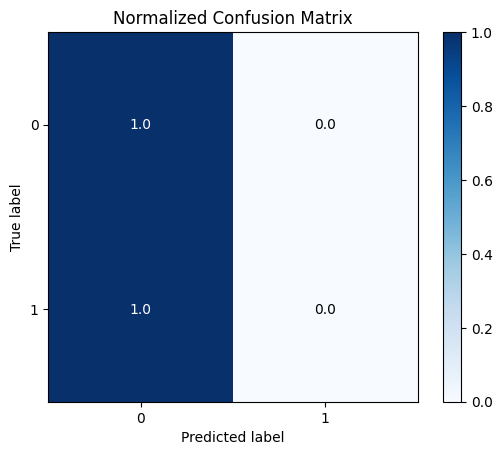

In [ ]:
# #Import the necessary functions
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


# #Evaluate on training data
# y_train_pred = model.predict(X_train)
# y_train_pred_binary = (y_train_pred > 0.5).astype(int).flatten()

# train_accuracy = accuracy_score(y_train, y_train_pred_binary)
# print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# # Evaluate on test data
# y_pred = model.predict(X_test)
# y_test_pred_binary = (y_pred > 0.5).astype(int).flatten()

# test_accuracy = accuracy_score(y_test, y_test_pred_binary)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# # Calculate evaluation metrics
# f1 = f1_score(y_test, y_test_pred_binary)
# precision = precision_score(y_test, y_test_pred_binary)
# recall = recall_score(y_test, y_test_pred_binary)

# print(f"F1 Score: {f1:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")

# # Confusion matrix
# conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
# print("Confusion Matrix:")
# print(conf_matrix)

# import scikitplot as skplt
# skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
# plt.show()

# Add the Bidirectional LSTM layer, TimeDistributed wrapper, Data augmentation function


In [ ]:
pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, TimeDistributed, LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_addons as tfa
import numpy as np

# Define the CNN-LSTM model with pretrained ResNet and additional improvements
def create_cnn_lstm_model(input_shape):
    # Load the ResNet50 model, excluding the top classification layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-10]:  # Fine-tune the last 10 layers
        layer.trainable = False

    # Add the TimeDistributed wrapper
    model = Sequential()
    model.add(TimeDistributed(base_model, input_shape=input_shape))
    model.add(TimeDistributed(Flatten()))
    model.add(TimeDistributed(BatchNormalization()))

    # Add the Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(128)))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Data augmentation function
def augment_data(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    angles = tf.random.uniform(shape=[], minval=-20.0, maxval=20.0, dtype=tf.float32)
    image = tfa.image.rotate(image, angles * np.pi / 180)
    return image, label

# Define input shape (num_frames, img_size[0], img_size[1], 3)
input_shape = (10, 224, 224, 3)
model = create_cnn_lstm_model(input_shape)

# Print the model summary
model.summary()

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prepare the datasets
batch_size = 2

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(augment_data).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Set up a model checkpoint
checkpoint = ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True)

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[checkpoint])



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDi  (None, 10, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, 10, 100352)        0         
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, 10, 100352)        401408    
 istributed)                                                     
                                                                 
 bidirectional_6 (Bidirecti  (None, 10, 256)           102892544 
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 256)              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


361/361 [==============================] - 125s 305ms/step - loss: 0.6924 - accuracy: 0.6214 - val_loss: 0.6139 - val_accuracy: 0.6929
Epoch 2/10
361/361 [==============================] - 97s 269ms/step - loss: 0.6629 - accuracy: 0.6338 - val_loss: 0.5958 - val_accuracy: 0.6929
Epoch 3/10
361/361 [==============================] - 115s 318ms/step - loss: 0.6539 - accuracy: 0.6436 - val_loss: 0.5874 - val_accuracy: 0.6971
Epoch 4/10
361/361 [==============================] - 98s 271ms/step - loss: 0.6440 - accuracy: 0.6519 - val_loss: 0.5407 - val_accuracy: 0.7095
Epoch 5/10
361/361 [==============================] - 79s 218ms/step - loss: 0.5978 - accuracy: 0.6782 - val_loss: 0.5843 - val_accuracy: 0.7054
Epoch 6/10
361/361 [==============================] - 113s 313ms/step - loss: 0.6012 - accuracy: 0.7157 - val_loss: 0.5343 - val_accuracy: 0.7178
Epoch 7/10
361/361 [==============================] - 104s 287ms/step - loss: 0.5777 - accuracy: 0.7129 - val_loss: 0.4876 - val_accuracy:

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 21s 931ms/step
Training Accuracy: 76.56%
8/8 [==============================] - 7s 956ms/step
Test Accuracy: 72.61%
F1 Score: 0.4407
Precision: 0.8966
Recall: 0.2921
Confusion Matrix:
[[149   3]
 [ 63  26]]


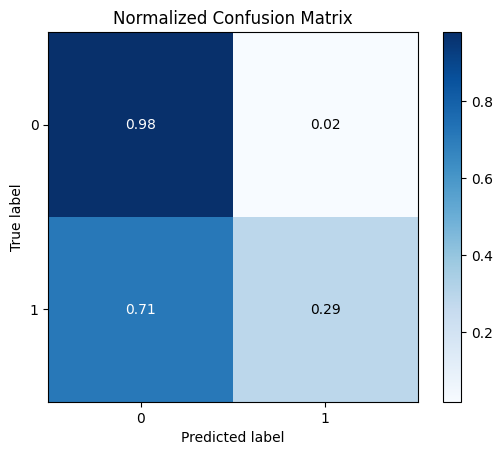

In [ ]:
#Import the necessary functions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


#Evaluate on training data
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int).flatten()

train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on test data
y_pred = model.predict(X_test)
y_test_pred_binary = (y_pred > 0.5).astype(int).flatten()

test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate evaluation metrics
f1 = f1_score(y_test, y_test_pred_binary)
precision = precision_score(y_test, y_test_pred_binary)
recall = recall_score(y_test, y_test_pred_binary)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()

In [ ]:
import time

# same model with EarlyStopping and 30 ephocs


In [ ]:
pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 54.9 MB/s eta 0:00:00


In [ ]:
# Start time
start_time = time.time()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, TimeDistributed, LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras_cv.layers import RandomRotation
import numpy as np

# Define the CNN-LSTM model with pretrained ResNet and additional improvements
def create_cnn_lstm_model(input_shape):
    # Load the ResNet50 model, excluding the top classification layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-10]:  # Fine-tune the last 10 layers
        layer.trainable = False

    # Add the TimeDistributed wrapper
    model = Sequential()
    model.add(TimeDistributed(base_model, input_shape=input_shape))
    model.add(TimeDistributed(Flatten()))
    model.add(TimeDistributed(BatchNormalization()))

    # Add the Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(128)))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Data augmentation function without TensorFlow Addons
def augment_data(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # Apply random rotation using Keras-CV
    rotation_layer = RandomRotation(factor=0.1)  # ~±20 degrees
    image = rotation_layer(image)

    return image, label

# Define input shape (num_frames, img_size[0], img_size[1], 3)
input_shape = (10, 224, 224, 3)
model = create_cnn_lstm_model(input_shape)

# Print the model summary
model.summary()

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prepare the datasets
batch_size = 2

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(augment_data).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Set up model checkpoints and early stopping
checkpoint = ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True)

# Train the model
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=[checkpoint])
end_time = time.time()

# Execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 10, 7, 7, 2048)      │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 10, 100352)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 10, 100352)          │         401,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 10, 256)             │     102,892,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,308,929 (485.65 MB)

 Trainable params: 107,986,177 (411.93 MB)

 Non-trainable params: 19,322,752 (73.71 MB)

Epoch 1/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6290 - loss: 0.6887

361/361 ━━━━━━━━━━━━━━━━━━━━ 147s 198ms/step - accuracy: 0.6290 - loss: 0.6886 - val_accuracy: 0.7095 - val_loss: 0.5732
Epoch 2/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6781 - loss: 0.6343

361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.6781 - loss: 0.6343 - val_accuracy: 0.7676 - val_loss: 0.5407
Epoch 3/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6567 - loss: 0.6341

361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.6567 - loss: 0.6341 - val_accuracy: 0.8008 - val_loss: 0.4707
Epoch 4/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.7148 - loss: 0.5919 - val_accuracy: 0.7925 - val_loss: 0.4815
Epoch 5/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.7056 - loss: 0.5660 - val_accuracy: 0.7635 - val_loss: 0.5896
Epoch 6/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.7207 - loss: 0.5773 - val_accuracy: 0.8340 - val_loss: 0.4815
Epoch 7/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.7273 - loss: 0.5706 - val_accuracy: 0.7842 - val_loss: 0.4976
Epoch 8/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.7501 - loss: 0.5558 - val_accuracy: 0.7012 - val_loss: 0.5746
Epoch 9/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7090 - loss: 0.5761

361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 138ms/step - accuracy: 0.7091 - loss: 0.5761 - val_accuracy: 0.8257 - val_loss: 0.4452
Epoch 10/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 131ms/step - accuracy: 0.8151 - loss: 0.5035 - val_accuracy: 0.8216 - val_loss: 0.4701
Epoch 11/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.7664 - loss: 0.5329 - val_accuracy: 0.8257 - val_loss: 0.4717
Epoch 12/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7884 - loss: 0.4882

361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.7883 - loss: 0.4882 - val_accuracy: 0.8548 - val_loss: 0.3972
Epoch 13/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8251 - loss: 0.4460

361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.8251 - loss: 0.4461 - val_accuracy: 0.8672 - val_loss: 0.3578
Epoch 14/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 132ms/step - accuracy: 0.8015 - loss: 0.4814 - val_accuracy: 0.8008 - val_loss: 0.4565
Epoch 15/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 131ms/step - accuracy: 0.7651 - loss: 0.4946 - val_accuracy: 0.8548 - val_loss: 0.3867
Epoch 16/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.8021 - loss: 0.4978 - val_accuracy: 0.8257 - val_loss: 0.4230
Epoch 17/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.7757 - loss: 0.4958 - val_accuracy: 0.8257 - val_loss: 0.4093
Epoch 18/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.8080 - loss: 0.4538 - val_accuracy: 0.8174 - val_loss: 0.4185
Epoch 19/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7846 - loss: 0.4569

361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.7846 - loss: 0.4569 - val_accuracy: 0.8465 - val_loss: 0.3506
Epoch 20/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 132ms/step - accuracy: 0.7902 - loss: 0.4769 - val_accuracy: 0.8091 - val_loss: 0.4730
Epoch 21/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 131ms/step - accuracy: 0.7957 - loss: 0.4526 - val_accuracy: 0.7718 - val_loss: 0.5432
Epoch 22/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 131ms/step - accuracy: 0.7888 - loss: 0.4932 - val_accuracy: 0.8299 - val_loss: 0.3955
Epoch 23/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.7957 - loss: 0.4435 - val_accuracy: 0.8506 - val_loss: 0.3625
Epoch 24/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.8142 - loss: 0.4251 - val_accuracy: 0.8423 - val_loss: 0.3889
Epoch 25/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.8340 - loss: 0.4360 - val_accuracy: 0.8589 - val_loss: 0.3547
Epoch 26/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8217 - loss: 0.4566

361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.8217 - loss: 0.4566 - val_accuracy: 0.8714 - val_loss: 0.3368
Epoch 27/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8092 - loss: 0.4300

361/361 ━━━━━━━━━━━━━━━━━━━━ 51s 140ms/step - accuracy: 0.8092 - loss: 0.4300 - val_accuracy: 0.8714 - val_loss: 0.3247
Epoch 28/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 132ms/step - accuracy: 0.7985 - loss: 0.4558 - val_accuracy: 0.8589 - val_loss: 0.3877
Epoch 29/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.8147 - loss: 0.4388 - val_accuracy: 0.8257 - val_loss: 0.4298
Epoch 30/30
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.8147 - loss: 0.4325 - val_accuracy: 0.8631 - val_loss: 0.3475
Execution time: 1566.2068679332733 seconds


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/model1.h5")

In [ ]:
# Load the model
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Colab Notebooks/model1.h5'
model = load_model(model_path)

#Prediction Code

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model_path = '/content/drive/MyDrive/Colab Notebooks/model1.h5'
model = load_model(model_path)

# Path to your input video
input_video_path = '/content/drive/MyDrive/Colab Notebooks/Deepfake Video Detection/id0_0000.mp4'
output_video_path = '/content/drive/MyDrive/Colab Notebooks/Deepfake Video Detection/output3_stamped.mp4'

# VideoCapture object
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Extract frames and make prediction
frames = []
frame_count = 0
max_frames = 10  # use only 10 frames as in your training

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break
    # Resize to model input size, for example 224x224
    resized_frame = cv2.resize(frame, (224, 224))
    frames.append(resized_frame)
    frame_count += 1

cap.release()

# Prepare frames for prediction
input_data = np.array(frames) / 255.0  # normalize
input_data = np.expand_dims(input_data, axis=0)  # shape: (1, 10, 224, 224, 3)

# Predict
prediction = model.predict(input_data)
label = "FAKE" if prediction[0][0] > 0.5 else "REAL"
print("Prediction:", label)

# Stamp the label onto each frame and write to video
cap = cv2.VideoCapture(input_video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Add label text
    cv2.putText(frame, f'DEEPFAKE STATUS: {label}', (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255) if label == "FAKE" else (0, 255, 0), 3)

    # Write frame
    out.write(frame)

cap.release()
out.release()
print(f"Stamped video saved to: {output_video_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
Prediction: REAL
Stamped video saved to: /content/drive/MyDrive/Colab Notebooks/Deepfake Video Detection/output3_stamped.mp4


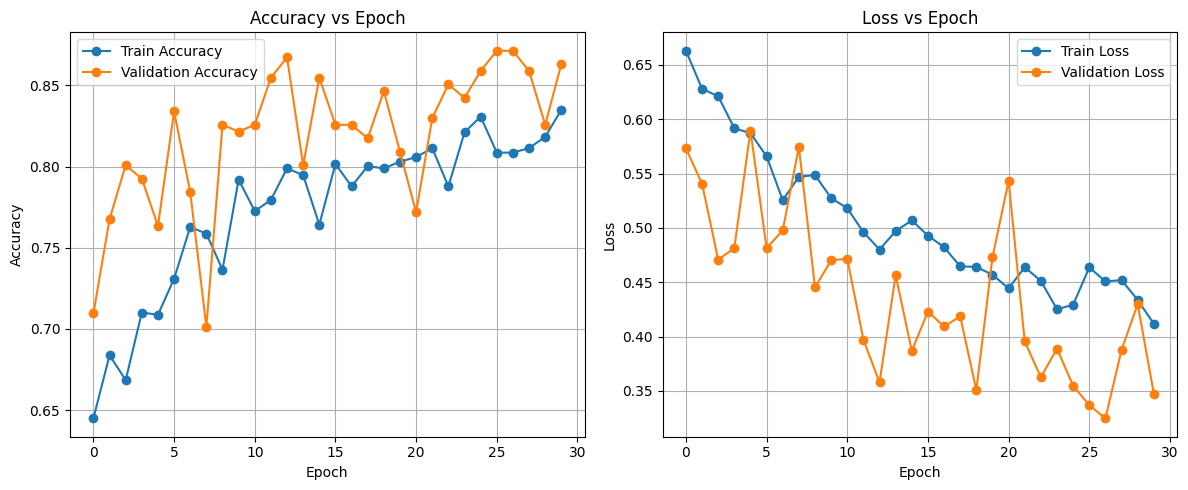

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy vs Epoch
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


121/121 ━━━━━━━━━━━━━━━━━━━━ 44s 213ms/step


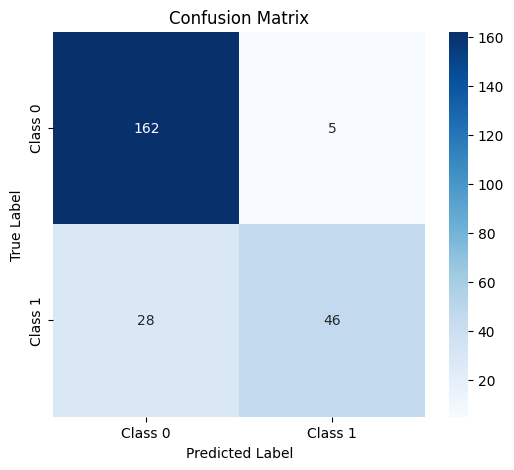

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       167
           1       0.90      0.62      0.74        74

    accuracy                           0.86       241
   macro avg       0.88      0.80      0.82       241
weighted avg       0.87      0.86      0.85       241



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from the model
y_pred = model.predict(val_dataset)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to 0 or 1

# Flatten labels if needed
y_true = np.concatenate([y for x, y in val_dataset], axis=0)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report for precision, recall, and F1-score
print(classification_report(y_true, y_pred_classes))


In [ ]:
pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
albumentations 2.0.4 requires scipy>=1.10.0, but you have scipy 1.9.3 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.9.3 which is incompatible.
ja

In [ ]:
!pip install scikit-plot



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
y_test_pred_binary = (y_pred > 0.4).astype(int).flatten()  # Lowered threshold


In [ ]:
import scikitplot as skplt # import the library scikitplot and give it an alias skplt
import matplotlib.pyplot as plt

y_test_pred_binary = (y_pred > 0.4).astype(int).flatten()  # Lowered threshold

skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=False)
plt.show()

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.11/dist-packages/scipy/__init__.py)

In [ ]:
skplt.metrics.plot_roc(y_test, y_pred)
plt.show()

NameError: name 'skplt' is not defined

In [ ]:
#Import the necessary functions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


#Evaluate on training data
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int).flatten()

train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on test data
y_pred = model.predict(X_test)
y_test_pred_binary = (y_pred > 0.5).astype(int).flatten()

test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate evaluation metrics
f1 = f1_score(y_test, y_test_pred_binary)
precision = precision_score(y_test, y_test_pred_binary)
recall = recall_score(y_test, y_test_pred_binary)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step
Training Accuracy: 86.96%
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step
Test Accuracy: 83.82%
F1 Score: 0.7417
Precision: 0.9032
Recall: 0.6292
Confusion Matrix:
[[146   6]
 [ 33  56]]


ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.11/dist-packages/scipy/__init__.py)

# With Uncropped Videos

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.1 MB/s eta 0:00:00


In [ ]:
start_time = time.time()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, TimeDistributed, LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_addons as tfa
import numpy as np

# Define the CNN-LSTM model with pretrained ResNet and additional improvements
def create_cnn_lstm_model(input_shape):
    # Load the ResNet50 model, excluding the top classification layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-10]:  # Fine-tune the last 10 layers
        layer.trainable = False

    # Add the TimeDistributed wrapper
    model = Sequential()
    model.add(TimeDistributed(base_model, input_shape=input_shape))
    model.add(TimeDistributed(Flatten()))
    model.add(TimeDistributed(BatchNormalization()))

    # Add the Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(128)))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Data augmentation function
def augment_data(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    angles = tf.random.uniform(shape=[], minval=-20.0, maxval=20.0, dtype=tf.float32)
    image = tfa.image.rotate(image, angles * np.pi / 180)
    return image, label

# Define input shape (num_frames, img_size[0], img_size[1], 3)
input_shape = (10, 224, 224, 3)
model = create_cnn_lstm_model(input_shape)

# Print the model summary
model.summary()

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prepare the datasets
batch_size = 2

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(augment_data).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Set up model checkpoints and early stopping
checkpoint = ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True)

# Train the model
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=[checkpoint])
# End time
end_time = time.time()

# Execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 10, 7, 7, 2048)    23587712  
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 100352)        0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 10, 100352)        401408    
 stributed)                                                      
                                                                 
 bidirectional (Bidirection  (None, 10, 256)           102892544 
 al)                                                             
                                                         

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


361/361 [==============================] - 120s 278ms/step - loss: 0.6743 - accuracy: 0.6089 - val_loss: 0.5941 - val_accuracy: 0.6763
Epoch 2/30
361/361 [==============================] - 79s 217ms/step - loss: 0.6525 - accuracy: 0.6366 - val_loss: 0.6024 - val_accuracy: 0.6722
Epoch 3/30
361/361 [==============================] - 79s 218ms/step - loss: 0.6467 - accuracy: 0.6338 - val_loss: 0.6210 - val_accuracy: 0.6473
Epoch 4/30
361/361 [==============================] - 79s 218ms/step - loss: 0.6157 - accuracy: 0.6782 - val_loss: 0.6005 - val_accuracy: 0.6805
Epoch 5/30
361/361 [==============================] - 109s 302ms/step - loss: 0.6210 - accuracy: 0.6741 - val_loss: 0.5881 - val_accuracy: 0.6929
Epoch 6/30
361/361 [==============================] - 100s 276ms/step - loss: 0.6133 - accuracy: 0.6852 - val_loss: 0.5762 - val_accuracy: 0.7344
Epoch 7/30
361/361 [==============================] - 121s 334ms/step - loss: 0.6031 - accuracy: 0.6741 - val_loss: 0.5752 - val_accuracy:

23/23 [==============================] - 23s 1s/step
Training Accuracy: 79.06%
8/8 [==============================] - 7s 1s/step
Test Accuracy: 69.71%
F1 Score: 0.4341
Precision: 0.7000
Recall: 0.3146
Confusion Matrix:
[[140  12]
 [ 61  28]]


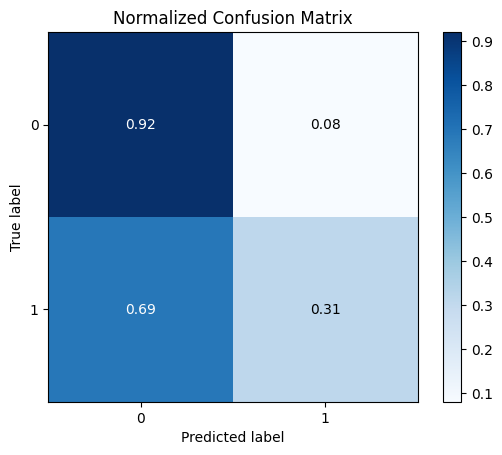

In [ ]:
#Import the necessary functions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


#Evaluate on training data
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int).flatten()

train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on test data
y_pred = model.predict(X_test)
y_test_pred_binary = (y_pred > 0.5).astype(int).flatten()

test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate evaluation metrics
f1 = f1_score(y_test, y_test_pred_binary)
precision = precision_score(y_test, y_test_pred_binary)
recall = recall_score(y_test, y_test_pred_binary)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()


In [ ]:
pip install scikit-plot


# **ViT Model**

Epoch 1: Train Loss=0.7108, Val Loss=0.7693, Val Acc=69.29%, Val F1=0.5673
Epoch 2: Train Loss=0.6897, Val Loss=0.6895, Val Acc=69.29%, Val F1=0.6305
Epoch 3: Train Loss=0.6621, Val Loss=0.6133, Val Acc=69.29%, Val F1=0.5673
Epoch 4: Train Loss=0.6717, Val Loss=0.6461, Val Acc=69.29%, Val F1=0.5673
Epoch 5: Train Loss=0.6613, Val Loss=0.7322, Val Acc=69.29%, Val F1=0.5673
Epoch 6: Train Loss=0.6601, Val Loss=0.6203, Val Acc=69.29%, Val F1=0.5673
Epoch 7: Train Loss=0.6562, Val Loss=0.6510, Val Acc=69.29%, Val F1=0.5673
Epoch 8: Train Loss=0.6633, Val Loss=0.6382, Val Acc=69.29%, Val F1=0.5673
Epoch 9: Train Loss=0.6486, Val Loss=0.6152, Val Acc=69.29%, Val F1=0.5673
Epoch 10: Train Loss=0.6528, Val Loss=0.6133, Val Acc=69.29%, Val F1=0.5673
Epoch 11: Train Loss=0.6569, Val Loss=0.6534, Val Acc=69.29%, Val F1=0.5673
Epoch 12: Train Loss=0.6508, Val Loss=0.6250, Val Acc=69.29%, Val F1=0.5673
Epoch 13: Train Loss=0.6520, Val Loss=0.6134, Val Acc=69.29%, Val F1=0.5673
Epoch 14: Train Loss=

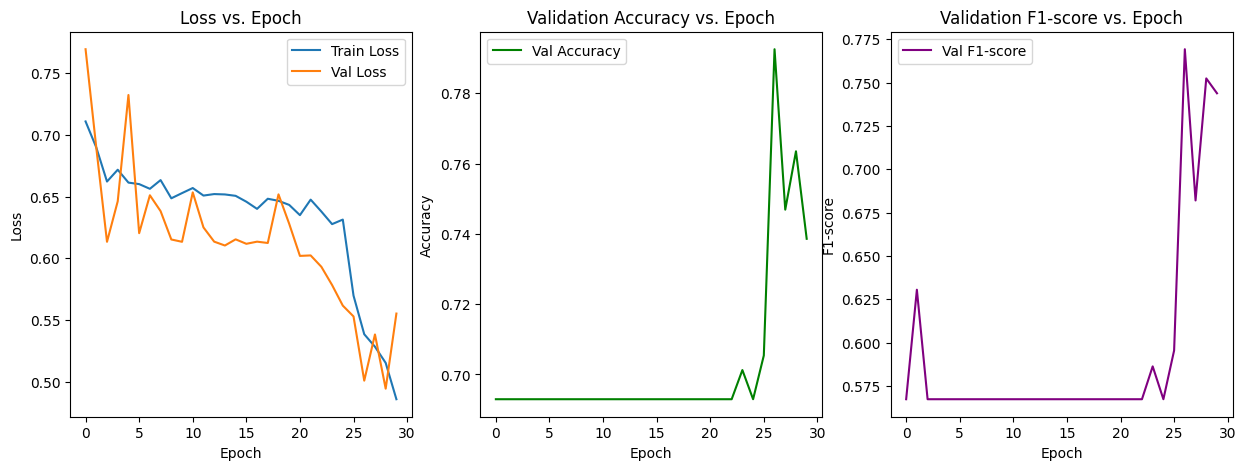


Test Accuracy: 67.22%
Test Precision: 0.6879
Test Recall: 0.6722


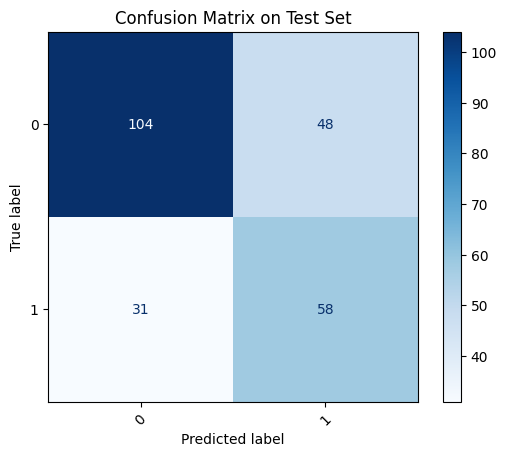

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import timm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# ====== Dataset class ======
class VideoFrameDataset(Dataset):
    def __init__(self, X, y):
        self.X = X  # shape: (samples, frames, H, W, C)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        frames = torch.tensor(self.X[idx]).permute(0, 3, 1, 2).float() / 255.0  # (10, 3, 224, 224)
        label = torch.tensor(self.y[idx]).long()
        return frames, label

# ====== Model Definition ======
class ViTVideoClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ViTVideoClassifier, self).__init__()
        self.vit = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=0)
        self.fc = nn.Linear(self.vit.num_features, num_classes)

    def forward(self, frames):  # frames: [B, 10, 3, 224, 224]
        B, T, C, H, W = frames.shape
        frames = frames.view(B * T, C, H, W)
        embeddings = self.vit(frames)  # [B*T, feature_dim]
        embeddings = embeddings.view(B, T, -1)
        embeddings = embeddings.mean(dim=1)
        out = self.fc(embeddings)
        return out

# ====== Replace with your loaded data ======
# Example: (use your own arrays)
# X_train, y_train, X_val, y_val, X_test, y_test = ...

train_dataset = VideoFrameDataset(X_train, y_train)
val_dataset = VideoFrameDataset(X_val, y_val)
test_dataset = VideoFrameDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# ====== Initialize model ======
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ViTVideoClassifier(num_classes=len(np.unique(y_train))).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ====== Tracking lists ======
train_losses, val_losses = [], []
val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], []

# ====== Training loop ======
for epoch in range(30):
    model.train()
    running_loss = 0
    for frames, labels in train_loader:
        frames, labels = frames.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(frames)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Validation evaluation
    model.eval()
    val_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for frames, labels in val_loader:
            frames, labels = frames.to(device), labels.to(device)
            outputs = model(frames)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_losses.append(val_loss / len(val_loader))
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    val_accuracies.append(acc)
    val_precisions.append(prec)
    val_recalls.append(rec)
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Val Loss={val_losses[-1]:.4f}, Val Acc={acc*100:.2f}%, Val F1={f1:.4f}")

# ====== Plotting graphs ======
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(val_accuracies, label='Val Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Epoch')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(val_f1s, label='Val F1-score', color='purple')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.title('Validation F1-score vs. Epoch')
plt.legend()

plt.show()

# ====== Test Evaluation with Confusion Matrix ======
model.eval()
all_preds_test = []
all_labels_test = []
with torch.no_grad():
    for frames, labels in test_loader:
        frames, labels = frames.to(device), labels.to(device)
        outputs = model(frames)
        preds = torch.argmax(outputs, dim=1)
        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

test_acc = accuracy_score(all_labels_test, all_preds_test)
test_prec = precision_score(all_labels_test, all_preds_test, average='weighted', zero_division=0)
test_rec = recall_score(all_labels_test, all_preds_test, average='weighted', zero_division=0)
test_f1 = f1_score(all_labels_test, all_preds_test, average='weighted', zero_division=0)

print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall: {test_rec:.4f}")


cm = confusion_matrix(all_labels_test, all_preds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.show()


In [ ]:
# ====== Test Evaluation with Confusion Matrix ======
model.eval()
all_preds_train = []
all_labels_train = []
with torch.no_grad():
    for frames, labels in train_loader:
        frames, labels = frames.to(device), labels.to(device)
        outputs = model(frames)
        preds = torch.argmax(outputs, dim=1)
        all_preds_train.extend(preds.cpu().numpy())
        all_labels_train.extend(labels.cpu().numpy())

train_acc = accuracy_score(all_labels_train, all_preds_train)
train_prec = precision_score(all_labels_train, all_preds_train, average='weighted', zero_division=0)
train_rec = recall_score(all_labels_train, all_preds_train, average='weighted', zero_division=0)
train_f1 = f1_score(all_labels_train, all_preds_train, average='weighted', zero_division=0)

print(f"\ntrain Accuracy: {train_acc*100:.2f}%")
print(f"train Precision: {train_prec:.4f}")
print(f"train Recall: {train_rec:.4f}")
print(f"train F1-score: {train_f1:.4f}")

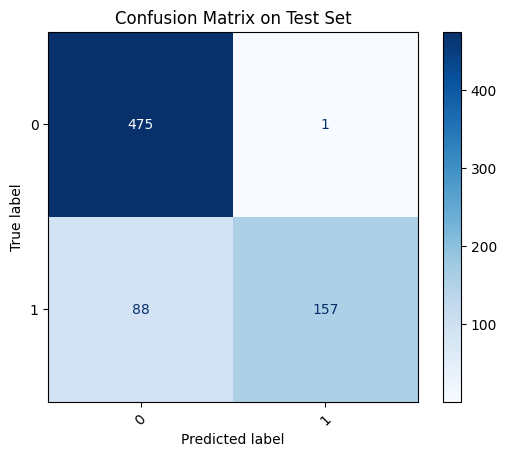

In [ ]:
cm = confusion_matrix(all_labels_train, all_preds_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.show()

In [ ]:
# Save the entire model
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/Deepfake Video Detection/vit_video_classifier.pth")
print("✅ Model saved as vit_video_classifier.pth")


✅ Model saved as vit_video_classifier.pth


In [ ]:
pip install opencv-python timm torch torchvision numpy matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
import torch
import torch.nn as nn
import timm
import numpy as np
import cv2
import os

# === Model definition (same as training) ===
class ViTVideoClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ViTVideoClassifier, self).__init__()
        self.vit = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=0)
        self.fc = nn.Linear(self.vit.num_features, num_classes)

    def forward(self, frames):
        B, T, C, H, W = frames.shape
        frames = frames.view(B * T, C, H, W)
        embeddings = self.vit(frames)
        embeddings = embeddings.view(B, T, -1)
        embeddings = embeddings.mean(dim=1)
        out = self.fc(embeddings)
        return out

# === Load trained model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(np.unique(y_train))  # Replace with your actual number of classes
model = ViTVideoClassifier(num_classes=num_classes).to(device)
model.load_state_dict(torch.load("vit_video_classifier.pth"))
model.eval()
print("✅ Model loaded.")

# === Function: Extract 10 frames from a video file ===
def extract_10_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames - 1, 100, dtype=int)

    frames = []
    for i in range(total_frames):
        ret, frame = cap.read()
        if not ret:
            break
        if i in frame_indices:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (224, 224))
            frames.append(frame)
    cap.release()
    frames = np.array(frames)
    return frames

# === Prediction function from video path ===
def predict_from_video(video_path):
    frames = extract_10_frames(video_path)
    video_tensor = torch.tensor(frames).permute(0, 3, 1, 2).unsqueeze(0).float().to(device) / 255.0
    with torch.no_grad():
        output = model(video_tensor)
        prediction = torch.argmax(output, dim=1).item()
    return prediction

# === Example usage ===
video_path = "/output_video.mp4"   # <<< Replace with your video file path
predicted_label = predict_from_video(video_path)
print(f"✅ Predicted label for the given video: {predicted_label}")


✅ Model loaded.
✅ Predicted label for the given video: 1


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight
import torchvision.transforms as T
import timm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# ====== Dataset class with augmentation ======
class VideoFrameDataset(Dataset):
    def __init__(self, X, y, augment=False):
        self.X = X  # shape: (samples, frames, H, W, C)
        self.y = y
        self.augment = augment
        self.transform = T.Compose([
            T.RandomHorizontalFlip(),
            T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            T.RandomResizedCrop(224, scale=(0.9, 1.0)),
        ])

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        frames = self.X[idx]  # (frames, H, W, C)
        frames_tensor = []
        for frame in frames:
            img = torch.tensor(frame).permute(2, 0, 1).float() / 255.0  # (C, H, W)
            if self.augment:
                img = self.transform(img)
            frames_tensor.append(img)
        frames_tensor = torch.stack(frames_tensor)  # (T, C, H, W)
        label = torch.tensor(self.y[idx]).long()
        return frames_tensor, label

# ====== ViT + Temporal Transformer Model ======
class ViTVideoClassifier(nn.Module):
    def __init__(self, num_classes, frames=16):
        super(ViTVideoClassifier, self).__init__()
        self.frames = frames
        self.vit = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=0)
        self.temporal_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=self.vit.num_features, nhead=8, batch_first=True),
            num_layers=2
        )
        self.fc = nn.Linear(self.vit.num_features, num_classes)

    def forward(self, frames):  # frames: [B, T, C, H, W]
        B, T, C, H, W = frames.shape
        frames = frames.view(B * T, C, H, W)
        embeddings = self.vit(frames)  # [B*T, feature_dim]
        embeddings = embeddings.view(B, T, -1)  # [B, T, feature_dim]
        embeddings = self.temporal_encoder(embeddings)  # [B, T, feature_dim]
        embeddings = embeddings.mean(dim=1)  # [B, feature_dim]
        out = self.fc(embeddings)
        return out

# ====== Load your data: X_train, y_train, X_val, y_val, X_test, y_test ======
# X arrays shape: (samples, frames=16, H, W, C)
# Ensure frames are sampled uniformly or randomly before passing in!

# ====== Compute class weights ======
class_weights = torch.tensor(
    compute_class_weight('balanced', classes=np.unique(y_train), y=y_train),
    dtype=torch.float
).to('cuda' if torch.cuda.is_available() else 'cpu')

# ====== DataLoaders ======
train_dataset = VideoFrameDataset(X_train, y_train, augment=True)
val_dataset = VideoFrameDataset(X_val, y_val)
test_dataset = VideoFrameDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# ====== Model, optimizer, scheduler ======
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ViTVideoClassifier(num_classes=len(np.unique(y_train)), frames=16).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# ====== Training Loop ======
train_losses, val_losses = [], []
val_accuracies, val_f1s = [], []

for epoch in range(50):  # train for more epochs
    model.train()
    running_loss = 0
    for frames, labels in train_loader:
        frames, labels = frames.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(frames)
        loss = F.cross_entropy(outputs, labels, weight=class_weights)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for frames, labels in val_loader:
            frames, labels = frames.to(device), labels.to(device)
            outputs = model(frames)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_losses.append(val_loss / len(val_loader))
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
    val_accuracies.append(acc)
    val_f1s.append(f1)

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Val Loss={val_losses[-1]:.4f}, Val Acc={acc*100:.2f}%, Val F1={f1:.4f}")
    scheduler.step()

# ====== Plot results ======
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(val_accuracies, label='Val Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(val_f1s, label='Val F1-score', color='purple')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.show()

# ====== Test evaluation ======
model.eval()
all_preds_test, all_labels_test = [], []
with torch.no_grad():
    for frames, labels in test_loader:
        frames, labels = frames.to(device), labels.to(device)
        outputs = model(frames)
        preds = torch.argmax(outputs, dim=1)
        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

test_acc = accuracy_score(all_labels_test, all_preds_test)
test_f1 = f1_score(all_labels_test, all_preds_test, average='weighted', zero_division=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test F1-score: {test_f1:.4f}")

cm = confusion_matrix(all_labels_test, all_preds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1: Train Loss=0.8548, Val Loss=0.6371, Val Acc=69.29%, Val F1=0.5673
Epoch 2: Train Loss=0.7157, Val Loss=0.6253, Val Acc=69.29%, Val F1=0.5673
Epoch 3: Train Loss=0.7040, Val Loss=0.6166, Val Acc=69.29%, Val F1=0.5673
Epoch 4: Train Loss=0.7133, Val Loss=0.6453, Val Acc=69.29%, Val F1=0.5673
Epoch 5: Train Loss=0.7051, Val Loss=0.7846, Val Acc=30.71%, Val F1=0.1443
Epoch 6: Train Loss=0.7192, Val Loss=0.6812, Val Acc=69.29%, Val F1=0.5673
Epoch 7: Train Loss=0.6966, Val Loss=0.6801, Val Acc=69.29%, Val F1=0.5673
Epoch 8: Train Loss=0.6934, Val Loss=0.6488, Val Acc=69.29%, Val F1=0.5673
Epoch 9: Train Loss=0.6901, Val Loss=0.6784, Val Acc=69.29%, Val F1=0.5673
Epoch 10: Train Loss=0.6913, Val Loss=0.6661, Val Acc=69.29%, Val F1=0.5673
Epoch 11: Train Loss=0.6874, Val Loss=0.6661, Val Acc=69.29%, Val F1=0.5673
Epoch 12: Train Loss=0.6885, Val Loss=0.6547, Val Acc=69.29%, Val F1=0.5673
Epoch 13: Train Loss=0.6927, Val Loss=0.6450, Val Acc=69.29%, Val F1=0.5673
